

1.   Correr la importación y limpieza (15min)
2.   Corer las librerías para CNN
3.   Seleccionar que modelo entrenar (solo 1 por sesión *NASNetLarge*)

Subir 75 - 25 // 70 - 30 Train Test fet

Autoescalara / autoescale (valor - mean / sd)

Cros validation fet

LR semifet

Plotsss fet

Ensamble classifier (Bagging y boosting)

PLS-DA amb señal UD en teoría mejor que RF Con CV





# Importación y limpieza Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
B = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/B.csv')
R = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/R.csv')
G = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/G.csv')

#Eliminamos la columna que se nos crea al guardar un dataframe en csv con el anterior python
R = R.drop(columns=['Unnamed: 0'])
G = G.drop(columns=['Unnamed: 0'])
B = B.drop(columns=['Unnamed: 0'])

#Eliminamos los '[' ']' para que no lea el data frame como str

R = R.replace(to_replace = r'\[', value='', regex=True)
R = R.replace(to_replace = r'\]', value='', regex=True)

G = G.replace(to_replace = r'\[', value='', regex=True) 
G = G.replace(to_replace = r'\]', value='', regex=True)

B = B.replace(to_replace = r'\[', value='', regex=True)
B = B.replace(to_replace = r'\]', value='', regex=True)

# Pasamos los valores que se leian como str a float
R = R.astype(float)
G = G.astype(float)
B = B.astype(float)

In [ ]:
Pacientes = []

for i in range(len(R)):
    print(i)
    P = pd.concat([R.iloc[i], G.iloc[i], B.iloc[i]])
    P = P.to_numpy().reshape(224, 224, 3)
    Pacientes.append(P)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
PBC = 589
PmBC1 = 109
Target = []
c = 0
for i in range(len(R)):
    
    if c < PBC:
        Target.append(0)
    else:
        Target.append(1)
    c = c + 1

In [ ]:
maxs = R.max()
Rmax = maxs.max()
print(maxs.max())

maxs = G.max()
Gmax = maxs.max()
print(maxs.max())

maxs = B.max()
Bmax = maxs.max()
print(maxs.max())

8301083.125
5137602.15625
11408906.40625


# Librerías para CNN

In [ ]:
import cv2 

# Librerías de Keras
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  

# Librerías de Sklearn
from sklearn.metrics import confusion_matrix, classification_report  

# Tensorflow
import tensorflow as tf  

# Librerías de plotting
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# VGG16 (TTS 90-10)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.10, 
    random_state=500)

In [ ]:
from keras.applications import vgg16

def crear_CNN():
    model = vgg16.VGG16(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation="softmax"
    )
    return model

In [ ]:
vgg16_model = crear_CNN()  
vgg16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse'])  

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
vgg16 = vgg16_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=64, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True) 

Epoch 1/100
10/10 [==============================] - 72s 3s/step - loss: 1687537.4023 - acc: 0.4405 - mse: 0.5576 - val_loss: 73.2043 - val_acc: 0.8857 - val_mse: 0.1143
Epoch 2/100
10/10 [==============================] - 8s 793ms/step - loss: 45.6304 - acc: 0.7796 - mse: 0.2130 - val_loss: 1.1448 - val_acc: 0.8857 - val_mse: 0.1140
Epoch 3/100
10/10 [==============================] - 8s 792ms/step - loss: 1.2681 - acc: 0.8291 - mse: 0.1586 - val_loss: 0.3771 - val_acc: 0.8857 - val_mse: 0.1064
Epoch 4/100
10/10 [==============================] - 8s 803ms/step - loss: 0.4595 - acc: 0.8518 - mse: 0.1274 - val_loss: 0.3457 - val_acc: 0.9000 - val_mse: 0.0831
Epoch 5/100
10/10 [==============================] - 8s 811ms/step - loss: 0.4791 - acc: 0.8470 - mse: 0.1282 - val_loss: 0.3466 - val_acc: 0.9000 - val_mse: 0.0883
Epoch 6/100
10/10 [==============================] - 8s 814ms/step - loss: 0.4064 - acc: 0.8702 - mse: 0.1128 - val_loss: 0.6421 - val_acc: 0.8857 - val_mse: 0.1134
Epoc

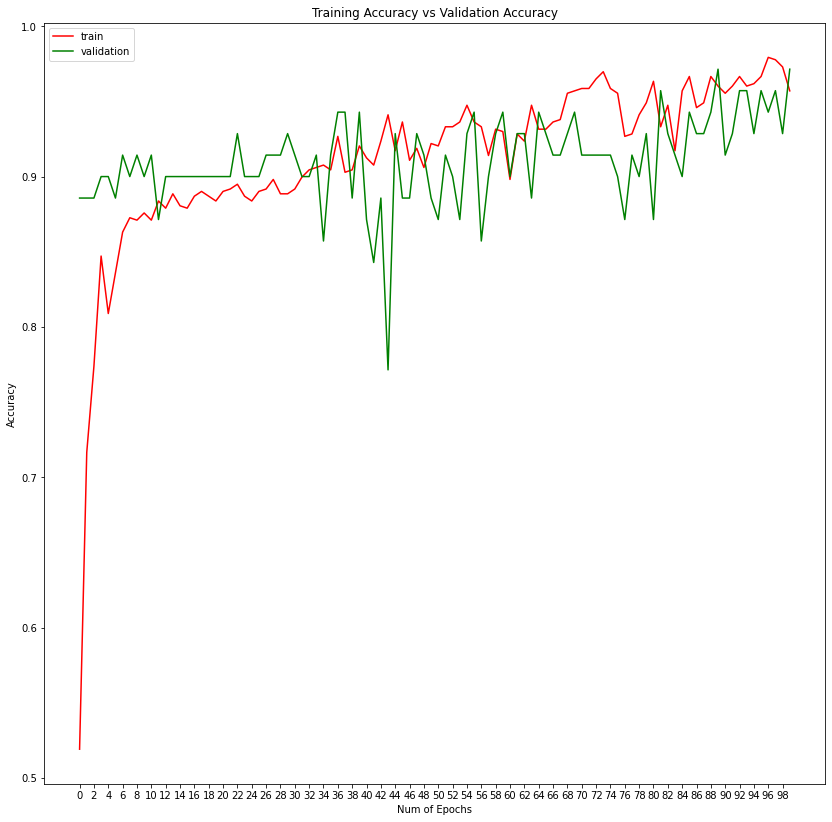

In [ ]:
plt.figure(0)  
plt.plot(vgg16.history['acc'],'r')  
plt.plot(vgg16.history['val_acc'],'g')  
plt.xticks(np.arange(0, 100, 2.0))  
plt.rcParams['figure.figsize'] = (20, 20)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

2/2 [==============================] - 0s 337ms/step


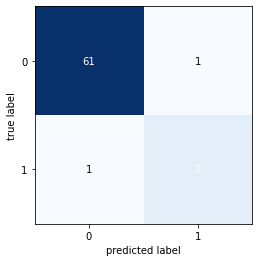

In [ ]:
vgg16_pred = vgg16_model.predict(X_test, batch_size=64, verbose=1)
vgg16_predicted = np.argmax(vgg16_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), vgg16_predicted))

plt.rcParams['figure.figsize'] = (2,2)  
plt.show()

In [ ]:
# Si queremos guardar el modelo
vgg16_model.save_weights('vgg16_final_NOnorm_100EPCH.hdf5')

# VGG16 (TTS 75-25)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.25, 
    random_state=500)

In [ ]:
from keras.applications import vgg16

def crear_CNN():
    model = vgg16.VGG16(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation="softmax"
    )
    return model

In [ ]:
vgg16_model = crear_CNN()  
vgg16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse'])  
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
vgg16 = vgg16_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=64, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True) 

Epoch 1/100
9/9 [==============================] - 83s 4s/step - loss: 9089461.8852 - acc: 0.6170 - mse: 0.3756 - val_loss: 4.5581 - val_acc: 0.8400 - val_mse: 0.1600
Epoch 2/100
9/9 [==============================] - 14s 2s/step - loss: 2.1460 - acc: 0.8284 - mse: 0.1584 - val_loss: 0.6488 - val_acc: 0.8400 - val_mse: 0.1527
Epoch 3/100
9/9 [==============================] - 14s 2s/step - loss: 0.6928 - acc: 0.8397 - mse: 0.1604 - val_loss: 0.6237 - val_acc: 0.8343 - val_mse: 0.2150
Epoch 4/100
9/9 [==============================] - 14s 2s/step - loss: 0.5249 - acc: 0.8310 - mse: 0.1638 - val_loss: 0.5344 - val_acc: 0.8400 - val_mse: 0.1713
Epoch 5/100
9/9 [==============================] - 14s 2s/step - loss: 0.5124 - acc: 0.8640 - mse: 0.1379 - val_loss: 0.3911 - val_acc: 0.8514 - val_mse: 0.1139
Epoch 6/100
9/9 [==============================] - 14s 2s/step - loss: 0.4049 - acc: 0.8606 - mse: 0.1159 - val_loss: 0.4382 - val_acc: 0.8514 - val_mse: 0.1198
Epoch 7/100
9/9 [===========

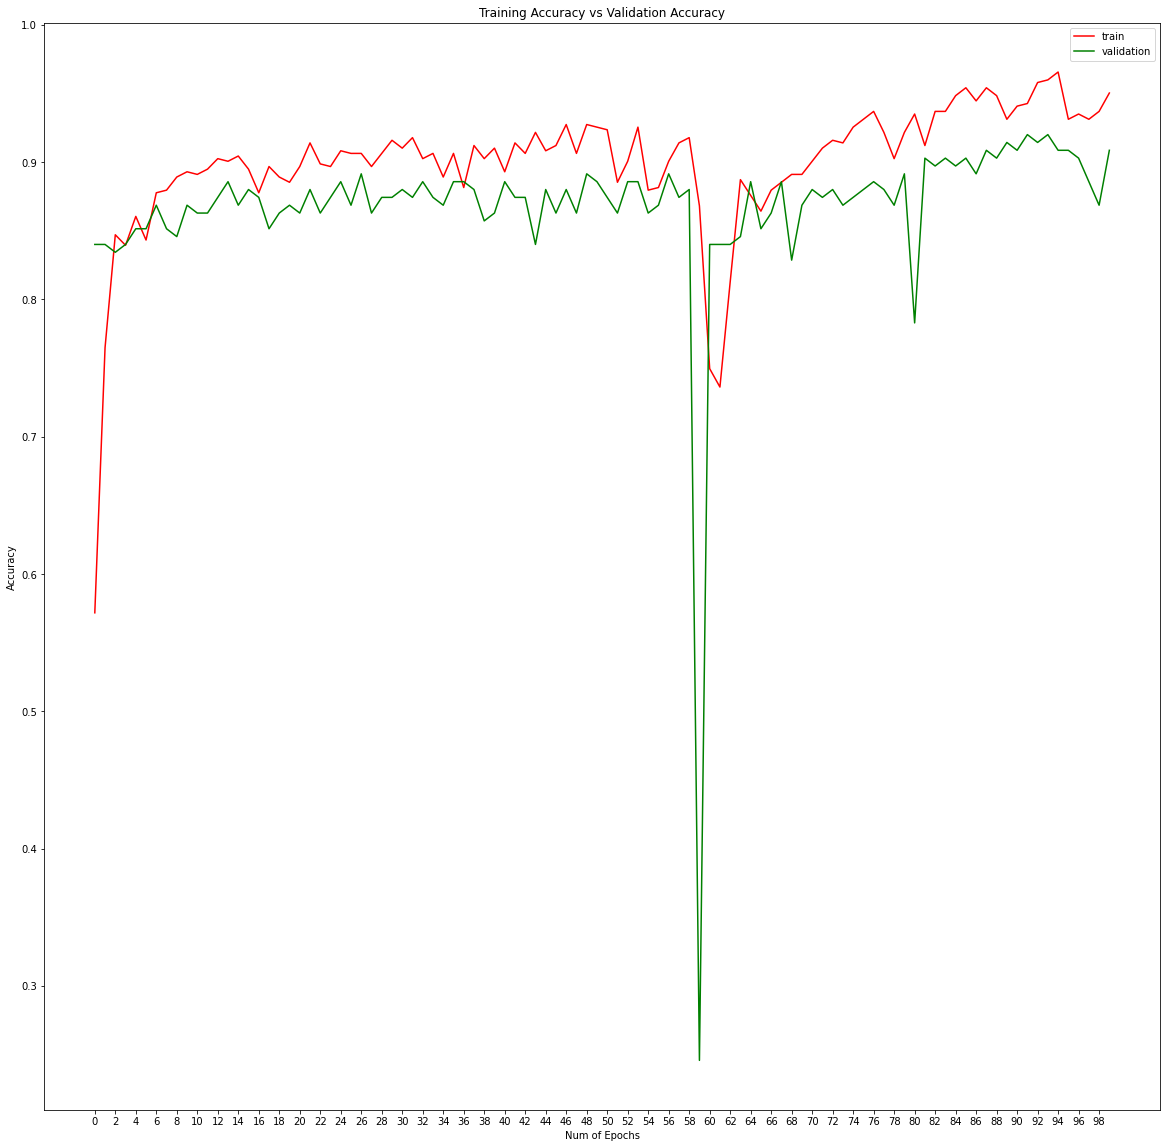

In [ ]:
plt.figure(0)  
plt.plot(vgg16.history['acc'],'r')  
plt.plot(vgg16.history['val_acc'],'g')  
plt.xticks(np.arange(0, 100, 2.0))  
plt.rcParams['figure.figsize'] = (20, 20)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

3/3 [==============================] - 1s 580ms/step


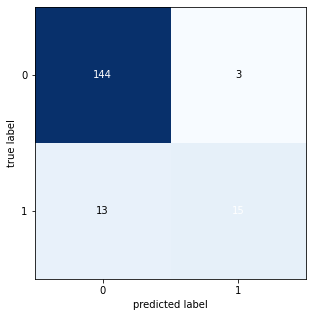

In [ ]:
vgg16_pred = vgg16_model.predict(X_test, batch_size=64, verbose=1)
vgg16_predicted = np.argmax(vgg16_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), vgg16_predicted))

plt.rcParams['figure.figsize'] = (5,5)  
plt.show()

In [ ]:
# Si queremos guardar el modelo
vgg16_model.save_weights('vgg16_75-25_final_NOnorm_100EPCH.hdf5')

# ResNET150V2 (TTS 85-15)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.15, 
    random_state=500)

In [ ]:
from keras.applications import ResNet152V2

def crear_ResNet():        
    model = tf.keras.applications.ResNet152V2(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation="softmax",
    )
    return model

In [ ]:
ResNet_model = crear_ResNet()
ResNet_model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])
ResNet_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
ResNet = ResNet_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=32, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True,) 

Epoch 1/100
10/10 [==============================] - 68s 2s/step - loss: 0.9666 - accuracy: 0.7142 - val_loss: 509807776.0000 - val_accuracy: 0.8476
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 0.3275 - accuracy: 0.8800 - val_loss: 609190528.0000 - val_accuracy: 0.8476
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 0.2878 - accuracy: 0.9042 - val_loss: 11351790.0000 - val_accuracy: 0.8476
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 0.2911 - accuracy: 0.9003 - val_loss: 102199.7891 - val_accuracy: 0.8476
Epoch 5/100
10/10 [==============================] - 13s 1s/step - loss: 0.2217 - accuracy: 0.9241 - val_loss: 1288.2733 - val_accuracy: 0.6571
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 0.2920 - accuracy: 0.8834 - val_loss: 863.5057 - val_accuracy: 0.8476
Epoch 7/100
10/10 [==============================] - 14s 1s/step - loss: 0.2481 - accuracy: 0.9093 - val_loss: 13.6807 - 

In [ ]:
ResNet_model.save_weights('ResNet150V2_final_NOnorm_100EPCH.hdf5')

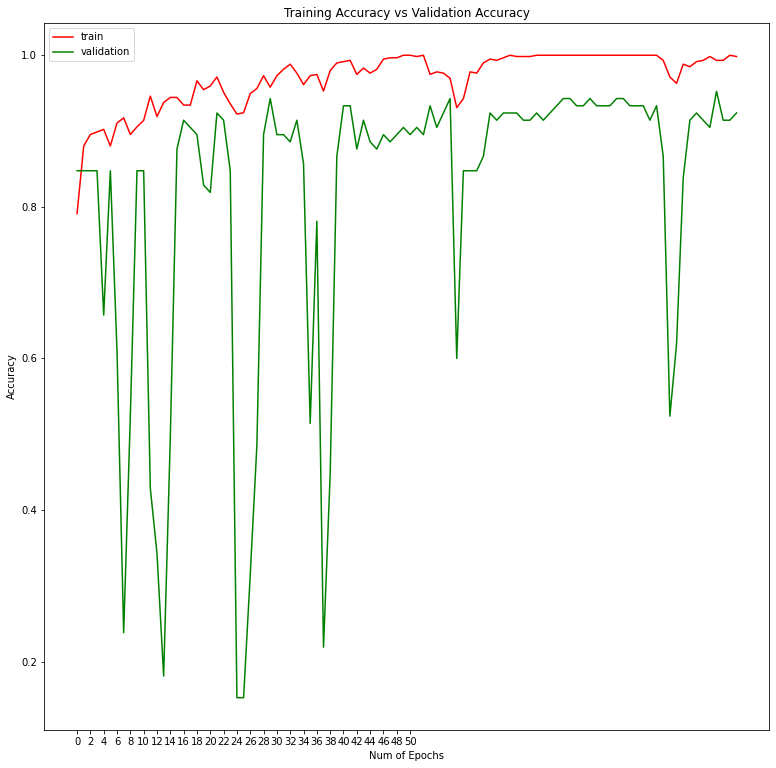

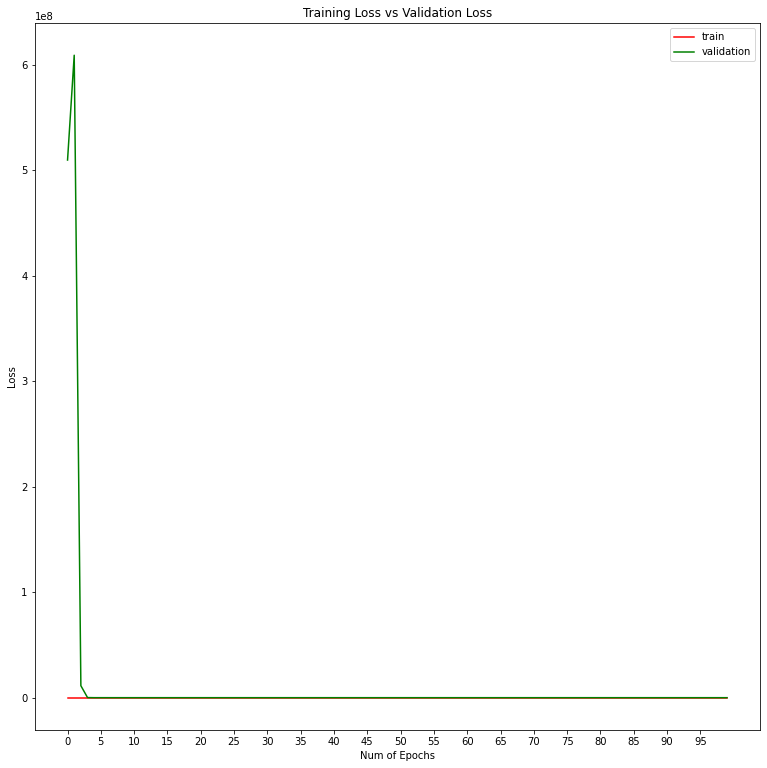

In [ ]:
plt.figure(0)  
plt.plot(ResNet.history['accuracy'],'r')  
plt.plot(ResNet.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 52, 2.0))  
plt.rcParams['figure.figsize'] = (13, 13)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1) 
plt.plot(ResNet.history['loss'],'r')  
plt.plot(ResNet.history['val_loss'],'g')  
plt.xticks(np.arange(0, 100, 5))  
plt.rcParams['figure.figsize'] = (13, 13)
#plt.axis([0, 100, 0, 1]) #[xmin, xmax, ymin, ymax]   
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

2/2 [==============================] - 1s 721ms/step


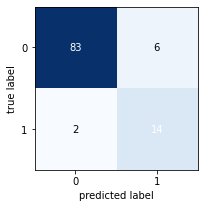

In [ ]:
ResNet_pred = ResNet_model.predict(X_test, batch_size=64, verbose=1)
ResNet_predicted = np.argmax(ResNet_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), ResNet_predicted))

plt.rcParams['figure.figsize'] = (4,4)  
plt.show()

# ResNET150V2(TTS 75-25)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.25, 
    random_state=500)

In [ ]:
from keras.applications import ResNet152V2

def crear_ResNet():        
    model = tf.keras.applications.ResNet152V2(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation="softmax",
    )
    return model

In [ ]:
ResNet_model = crear_ResNet()
ResNet_model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])
ResNet_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
ResNet = ResNet_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=32, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True,) 

Epoch 1/100
17/17 [==============================] - 65s 1s/step - loss: 0.8089 - accuracy: 0.6984 - val_loss: 53785227264.0000 - val_accuracy: 0.8400
Epoch 2/100
17/17 [==============================] - 12s 732ms/step - loss: 0.3640 - accuracy: 0.8697 - val_loss: 26173296.0000 - val_accuracy: 0.8400
Epoch 3/100
17/17 [==============================] - 13s 744ms/step - loss: 0.2870 - accuracy: 0.9035 - val_loss: 11697.5967 - val_accuracy: 0.8400
Epoch 4/100
17/17 [==============================] - 13s 761ms/step - loss: 0.2902 - accuracy: 0.9158 - val_loss: 350.1329 - val_accuracy: 0.8400
Epoch 5/100
17/17 [==============================] - 13s 776ms/step - loss: 0.3083 - accuracy: 0.8805 - val_loss: 15.4901 - val_accuracy: 0.8400
Epoch 6/100
17/17 [==============================] - 13s 793ms/step - loss: 0.2935 - accuracy: 0.8841 - val_loss: 1.7709 - val_accuracy: 0.8400
Epoch 7/100
17/17 [==============================] - 14s 817ms/step - loss: 0.2870 - accuracy: 0.8842 - val_loss: 1

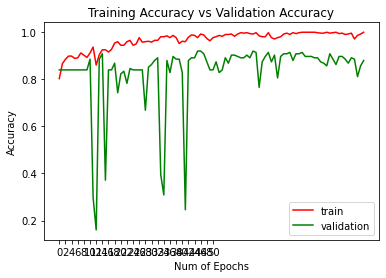

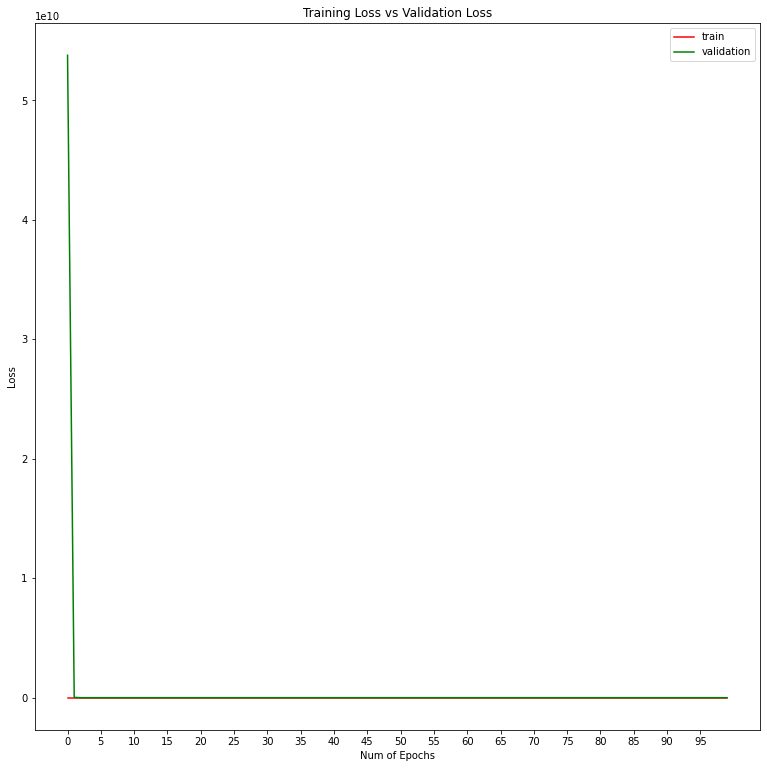

In [ ]:
plt.figure(0)  
plt.plot(ResNet.history['accuracy'],'r')  
plt.plot(ResNet.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 52, 2.0))  
plt.rcParams['figure.figsize'] = (13, 13)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1) 
plt.plot(ResNet.history['loss'],'r')  
plt.plot(ResNet.history['val_loss'],'g')  
plt.xticks(np.arange(0, 100, 5))  
plt.rcParams['figure.figsize'] = (13, 13)
#plt.axis([0, 100, 0, 1]) #[xmin, xmax, ymin, ymax]   
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()  

3/3 [==============================] - 6s 1s/step


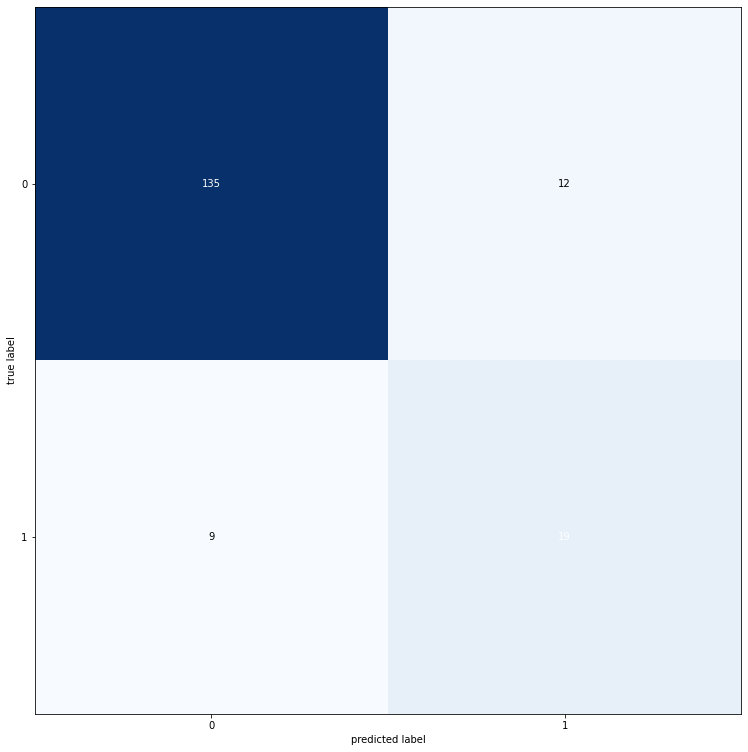

In [ ]:
ResNet_pred = ResNet_model.predict(X_test, batch_size=64, verbose=1)
ResNet_predicted = np.argmax(ResNet_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), ResNet_predicted))

plt.rcParams['figure.figsize'] = (4,4)  
plt.show()

In [ ]:
ResNet_model.save_weights('ResNet150V2_75-25_final_NOnorm_100EPCH.hdf5')

# VGG19 (TTS 85-15)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.15, 
    random_state=500)

In [ ]:
from keras.applications import vgg19

def crear_CNN():
    model = vgg19.VGG19(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation="softmax"
    )
    return model

In [ ]:
vgg19_model = crear_CNN()  
vgg19_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse'])  
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
vgg19 = vgg19_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=64, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True) 

Epoch 1/100
10/10 [==============================] - 69s 2s/step - loss: 40463675.7753 - acc: 0.6094 - mse: 0.3779 - val_loss: 279.5371 - val_acc: 0.8476 - val_mse: 0.1524
Epoch 2/100
10/10 [==============================] - 9s 860ms/step - loss: 272.2741 - acc: 0.7075 - mse: 0.2925 - val_loss: 8.9185 - val_acc: 0.8476 - val_mse: 0.1524
Epoch 3/100
10/10 [==============================] - 9s 869ms/step - loss: 4.5605 - acc: 0.6539 - mse: 0.3187 - val_loss: 5.9736 - val_acc: 0.8476 - val_mse: 0.1524
Epoch 4/100
10/10 [==============================] - 9s 868ms/step - loss: 4.4281 - acc: 0.7474 - mse: 0.2176 - val_loss: 4.2025 - val_acc: 0.1524 - val_mse: 0.8179
Epoch 5/100
10/10 [==============================] - 9s 869ms/step - loss: 1.7623 - acc: 0.6565 - mse: 0.3292 - val_loss: 0.4562 - val_acc: 0.8476 - val_mse: 0.1339
Epoch 6/100
10/10 [==============================] - 9s 875ms/step - loss: 0.6091 - acc: 0.7288 - mse: 0.1933 - val_loss: 0.4768 - val_acc: 0.8476 - val_mse: 0.1421
E

In [ ]:
vgg19_model.save_weights('vgg19_final_NOnorm_100EPCH.hdf5')

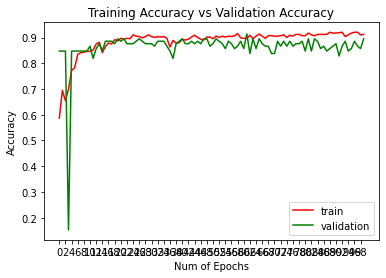

In [ ]:
plt.figure(0)  
plt.plot(vgg19.history['acc'],'r')  
plt.plot(vgg19.history['val_acc'],'g')  
plt.xticks(np.arange(0, 100, 2.0))  
plt.rcParams['figure.figsize'] = (20, 20)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

2/2 [==============================] - 1s 502ms/step


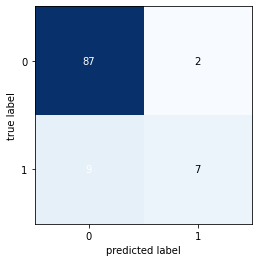

In [ ]:
vgg19_pred = vgg19_model.predict(X_test, batch_size=64, verbose=1)
vgg19_predicted = np.argmax(vgg19_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), vgg19_predicted))

plt.rcParams['figure.figsize'] = (5,5)  
plt.show()

# VGG19 (TTS 75-25)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.25, 
    random_state=500)

In [ ]:
from keras.applications import vgg19

def crear_CNN():
    model = vgg19.VGG19(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation="softmax"
    )
    return model

In [ ]:
vgg19_model = crear_CNN()  
vgg19_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse'])  
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
vgg19 = vgg19_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=64, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True) 

Epoch 1/100
9/9 [==============================] - 69s 2s/step - loss: 34455682.8341 - acc: 0.5457 - mse: 0.4530 - val_loss: 0.9416 - val_acc: 0.8400 - val_mse: 0.1584
Epoch 2/100
9/9 [==============================] - 8s 891ms/step - loss: 0.6766 - acc: 0.7694 - mse: 0.1593 - val_loss: 2.9513 - val_acc: 0.1543 - val_mse: 0.7767
Epoch 3/100
9/9 [==============================] - 8s 900ms/step - loss: 63.1268 - acc: 0.5274 - mse: 0.4378 - val_loss: 1.7096 - val_acc: 0.8400 - val_mse: 0.1600
Epoch 4/100
9/9 [==============================] - 8s 912ms/step - loss: 1.8247 - acc: 0.8568 - mse: 0.1420 - val_loss: 0.7257 - val_acc: 0.3714 - val_mse: 0.2670
Epoch 5/100
9/9 [==============================] - 8s 920ms/step - loss: 0.8097 - acc: 0.5944 - mse: 0.2443 - val_loss: 0.7512 - val_acc: 0.8400 - val_mse: 0.1559
Epoch 6/100
9/9 [==============================] - 8s 929ms/step - loss: 0.6286 - acc: 0.7589 - mse: 0.1726 - val_loss: 0.4832 - val_acc: 0.8400 - val_mse: 0.1411
Epoch 7/100
9/9 

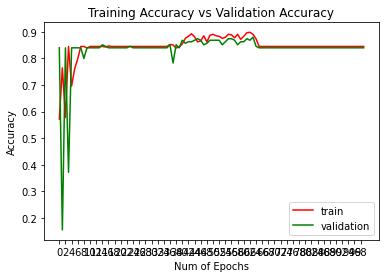

In [ ]:
plt.figure(0)  
plt.plot(vgg19.history['acc'],'r')  
plt.plot(vgg19.history['val_acc'],'g')  
plt.xticks(np.arange(0, 100, 2.0))  
plt.rcParams['figure.figsize'] = (20, 20)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

3/3 [==============================] - 1s 381ms/step


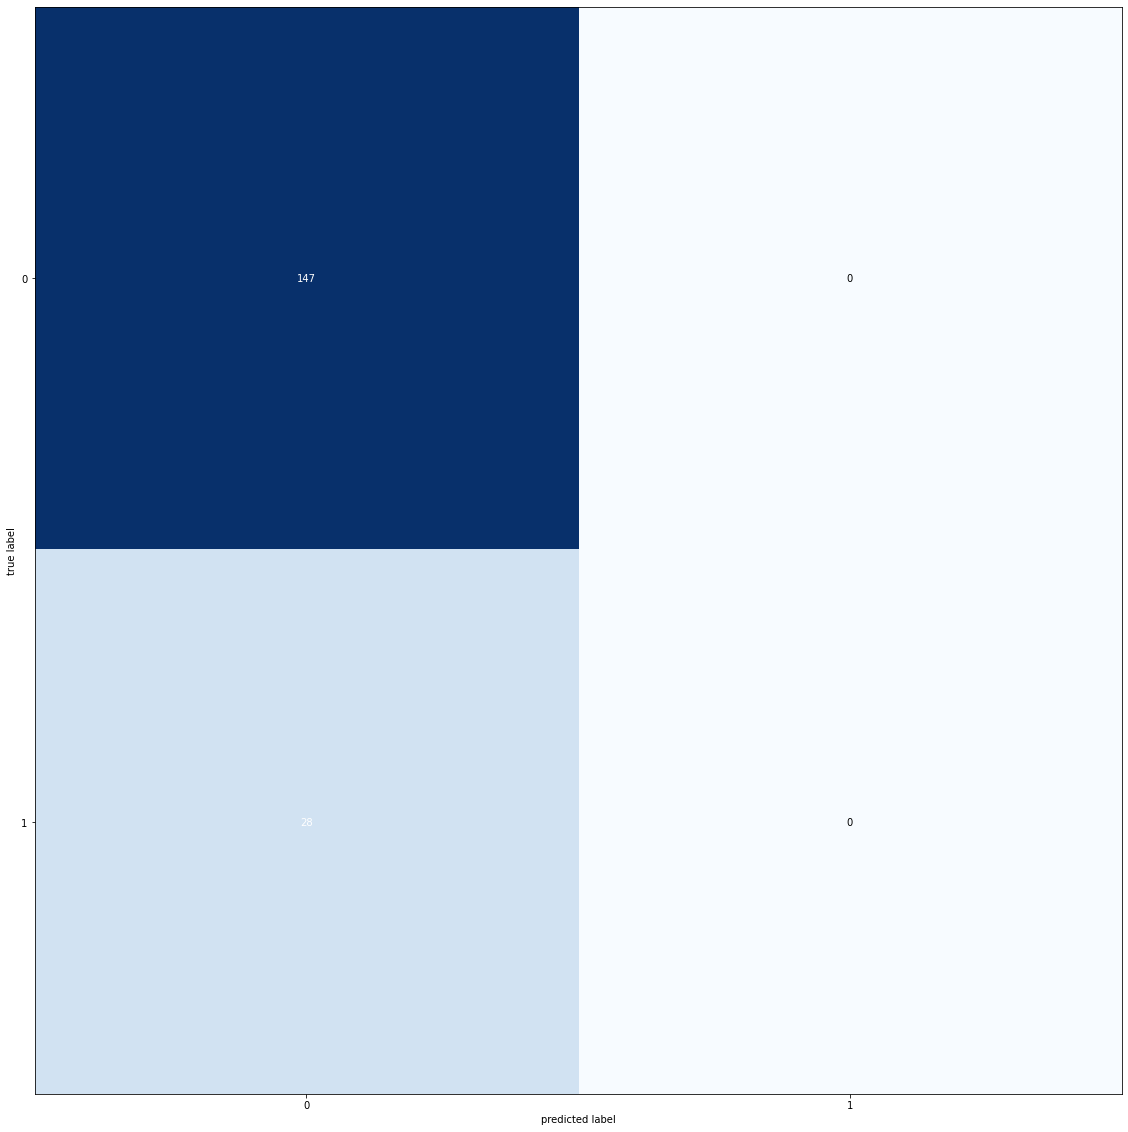

In [ ]:
vgg19_pred = vgg19_model.predict(X_test, batch_size=64, verbose=1)
vgg19_predicted = np.argmax(vgg19_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), vgg19_predicted))

plt.rcParams['figure.figsize'] = (5,5)  
plt.show()

In [ ]:
vgg19_model.save_weights('vgg19_75-25_final_NOnorm_100EPCH.hdf5')

#NasNetLarge (TOP 1 de Keras)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.15, 
    random_state=500)

In [ ]:
from keras.applications import NASNetLarge

def crear_CNN():
    model = tf.keras.applications.NASNetLarge(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        )
    return model    

In [ ]:
NASNetLarge_model = crear_CNN()  
NASNetLarge_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse'])  
NASNetLarge_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 111, 111, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 111, 111, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True
#tf.compat.v1.Session(config = config)

NASNetLarge = NASNetLarge_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=64, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True) 

Epoch 1/100


ResourceExhaustedError: ignored

In [ ]:
NASNetLarge_model.save_weights('NasNEtLarge_final_NOnorm_100EPCH.hdf5')

In [ ]:
plt.figure(0)  
plt.plot(NASNetLarge.history['acc'],'r')  
plt.plot(NASNetLarge.history['val_acc'],'g')  
plt.xticks(np.arange(0, 100, 2.0))  
plt.rcParams['figure.figsize'] = (20, 20)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

In [ ]:
NASNetLarge_pred = NASNetLarge_model.predict(X_test, batch_size=64, verbose=1)
NASNetLarge_predicted = np.argmax(NASNetLarge_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), vgg19_predicted))

plt.rcParams['figure.figsize'] = (5,5)  
plt.show()

# Inception ResNetV2 (TTS 85 - 15)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.15, 
    random_state=500)

In [ ]:
def crear_CNN():
    model = tf.keras.applications.InceptionResNetV2(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation='softmax'
        )
    return model    

In [ ]:
InceptionRNV2_model = crear_CNN()  
InceptionRNV2_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse'])  
InceptionRNV2_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
InceptionRNV2 = InceptionRNV2_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=64, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True) 

Epoch 1/100
10/10 [==============================] - 69s 2s/step - loss: 0.8246 - acc: 0.8085 - mse: 0.1586 - val_loss: 78.8337 - val_acc: 0.8476 - val_mse: 0.1524
Epoch 2/100
10/10 [==============================] - 10s 980ms/step - loss: 0.2937 - acc: 0.8939 - mse: 0.0857 - val_loss: 56.8666 - val_acc: 0.8476 - val_mse: 0.1524
Epoch 3/100
10/10 [==============================] - 10s 987ms/step - loss: 0.2531 - acc: 0.9111 - mse: 0.0728 - val_loss: 8.3722 - val_acc: 0.8476 - val_mse: 0.1536
Epoch 4/100
10/10 [==============================] - 10s 994ms/step - loss: 0.2365 - acc: 0.9146 - mse: 0.0674 - val_loss: 3.8684 - val_acc: 0.8476 - val_mse: 0.1533
Epoch 5/100
10/10 [==============================] - 10s 998ms/step - loss: 0.2016 - acc: 0.9301 - mse: 0.0580 - val_loss: 1.2063 - val_acc: 0.8476 - val_mse: 0.1479
Epoch 6/100
10/10 [==============================] - 10s 1s/step - loss: 0.1920 - acc: 0.9200 - mse: 0.0546 - val_loss: 0.6887 - val_acc: 0.8476 - val_mse: 0.1326
Epoch 7/

In [ ]:
InceptionRNV2_model.save_weights('InceptionRNV2_final_NOnorm_100EPCH.hdf5')

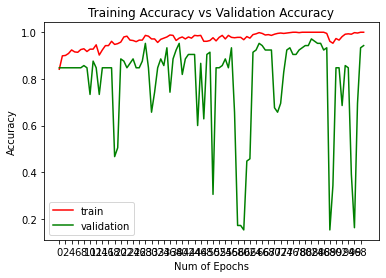

In [ ]:
plt.figure(0)  
plt.plot(InceptionRNV2.history['acc'],'r')  
plt.plot(InceptionRNV2.history['val_acc'],'g')  
plt.xticks(np.arange(0, 100, 2.0))  
plt.rcParams['figure.figsize'] = (20, 20)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

2/2 [==============================] - 1s 478ms/step


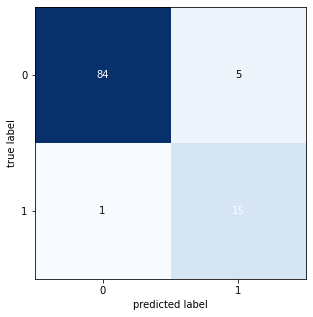

In [ ]:
InceptionRNV2_pred = InceptionRNV2_model.predict(X_test, batch_size=64, verbose=1)
InceptionRNV2_predicted = np.argmax(InceptionRNV2_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), InceptionRNV2_predicted))

plt.rcParams['figure.figsize'] = (5,5)  
plt.show()

# Inception ResNET (TTS 75-25)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.25, 
    random_state=700)

In [ ]:
def crear_CNN():
    model = tf.keras.applications.InceptionResNetV2(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation='softmax'
        )
    return model    

In [ ]:
InceptionRNV2_model = crear_CNN()  
InceptionRNV2_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc', 'mse'])  
InceptionRNV2_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
InceptionRNV2 = InceptionRNV2_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=64, 
    epochs=100, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True) 

Epoch 1/100
9/9 [==============================] - 84s 3s/step - loss: 0.9413 - acc: 0.8299 - mse: 0.1584 - val_loss: 14.9269 - val_acc: 0.8857 - val_mse: 0.1143
Epoch 2/100
9/9 [==============================] - 22s 2s/step - loss: 0.3403 - acc: 0.8823 - mse: 0.0941 - val_loss: 11.4863 - val_acc: 0.8857 - val_mse: 0.1143
Epoch 3/100
9/9 [==============================] - 22s 2s/step - loss: 0.2651 - acc: 0.9025 - mse: 0.0758 - val_loss: 3.4953 - val_acc: 0.8857 - val_mse: 0.1167
Epoch 4/100
9/9 [==============================] - 22s 2s/step - loss: 0.2400 - acc: 0.9091 - mse: 0.0687 - val_loss: 0.8553 - val_acc: 0.6171 - val_mse: 0.2848
Epoch 5/100
9/9 [==============================] - 22s 2s/step - loss: 0.2317 - acc: 0.9025 - mse: 0.0689 - val_loss: 0.5155 - val_acc: 0.8857 - val_mse: 0.1108
Epoch 6/100
9/9 [==============================] - 22s 2s/step - loss: 0.2929 - acc: 0.8832 - mse: 0.0886 - val_loss: 0.4250 - val_acc: 0.8857 - val_mse: 0.1068
Epoch 7/100
9/9 [===============

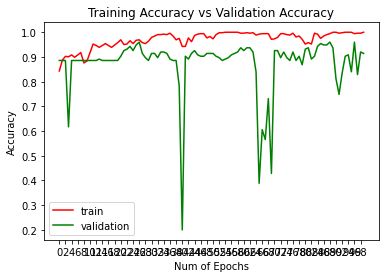

In [ ]:
plt.figure(0)  
plt.plot(InceptionRNV2.history['acc'],'r')  
plt.plot(InceptionRNV2.history['val_acc'],'g')  
plt.xticks(np.arange(0, 100, 2.0))  
plt.rcParams['figure.figsize'] = (20, 20)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

3/3 [==============================] - 6s 1s/step


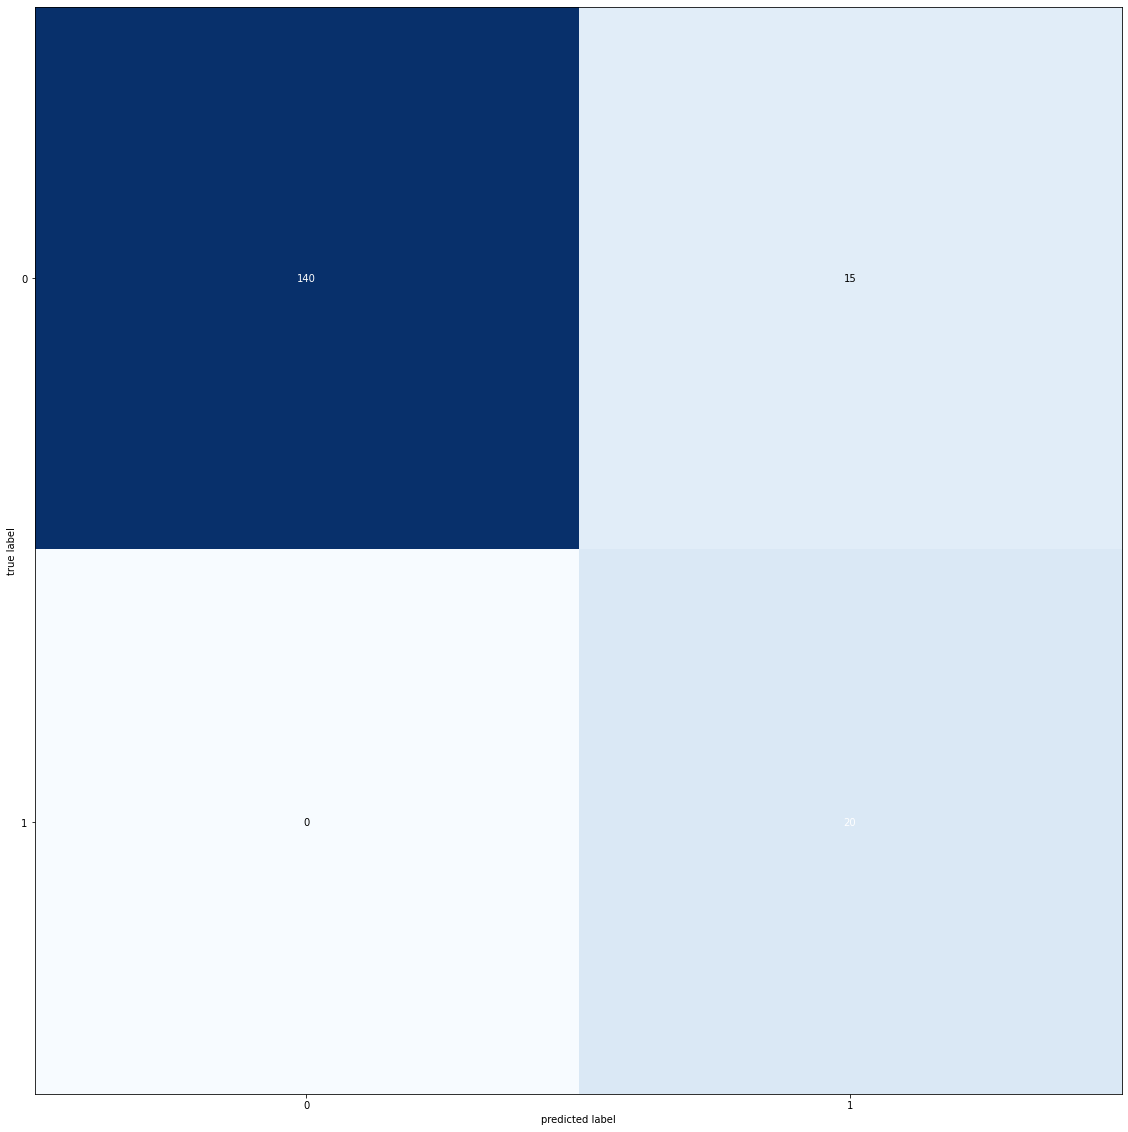

In [ ]:
InceptionRNV2_pred = InceptionRNV2_model.predict(X_test, batch_size=64, verbose=1)
InceptionRNV2_predicted = np.argmax(InceptionRNV2_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), InceptionRNV2_predicted))

plt.rcParams['figure.figsize'] = (5,5)  
plt.show()

In [ ]:
InceptionRNV2_model.save_weights('InceptionRNV2_75-25_final_NOnorm_100EPCH.hdf5')

# Inception ResNEtV2 LR modifier

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.15, 
    random_state=500)

In [ ]:
def crear_CNN():
    model = tf.keras.applications.InceptionResNetV2(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation='softmax'
        )
    return model 

In [ ]:
InceptionRNV2_model = crear_CNN() 

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1,
    decay_rate=0.9)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

InceptionRNV2_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc', 'mse']) 

InceptionRNV2_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
________________________________________________________________________________

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
InceptionRNV2 = InceptionRNV2_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=64, 
    epochs=50, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True) 

Epoch 1/50
10/10 [==============================] - 57s 1s/step - loss: 1.4948 - acc: 0.6499 - mse: 0.2018 - val_loss: 108340276162184551998543181643776.0000 - val_acc: 0.8476 - val_mse: 0.1524
Epoch 2/50
10/10 [==============================] - 6s 581ms/step - loss: 0.4901 - acc: 0.8261 - mse: 0.1396 - val_loss: 49144206082756556256968704.0000 - val_acc: 0.8476 - val_mse: 0.1524
Epoch 3/50
10/10 [==============================] - 6s 581ms/step - loss: 0.3661 - acc: 0.8529 - mse: 0.1081 - val_loss: 957012809753905070080.0000 - val_acc: 0.8476 - val_mse: 0.1524
Epoch 4/50
10/10 [==============================] - 6s 579ms/step - loss: 0.3930 - acc: 0.8726 - mse: 0.1065 - val_loss: 8419679404032000.0000 - val_acc: 0.8476 - val_mse: 0.1524
Epoch 5/50
10/10 [==============================] - 6s 581ms/step - loss: 0.3918 - acc: 0.8640 - mse: 0.1086 - val_loss: 6778061324288.0000 - val_acc: 0.1524 - val_mse: 0.8476
Epoch 6/50
10/10 [==============================] - 6s 579ms/step - loss: 0.39

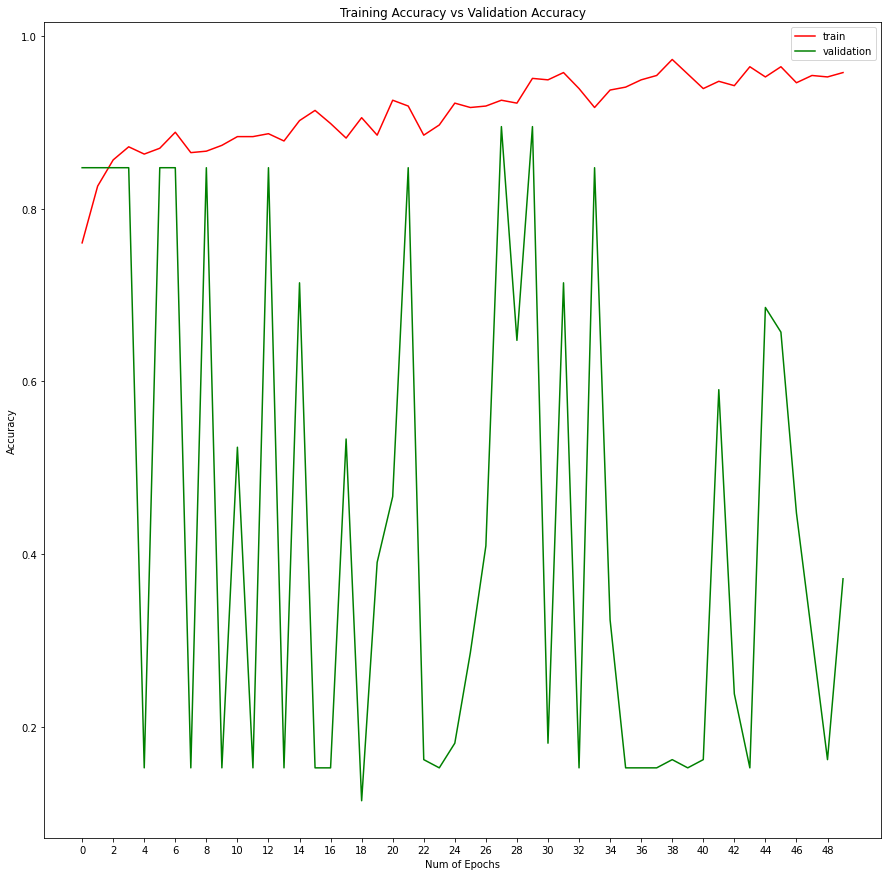

In [ ]:
plt.figure(0)  
plt.plot(InceptionRNV2.history['acc'],'r')  
plt.plot(InceptionRNV2.history['val_acc'],'g')  
plt.xticks(np.arange(0, 50, 2.0))  
plt.rcParams['figure.figsize'] = (20, 15)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

2/2 [==============================] - 3s 276ms/step


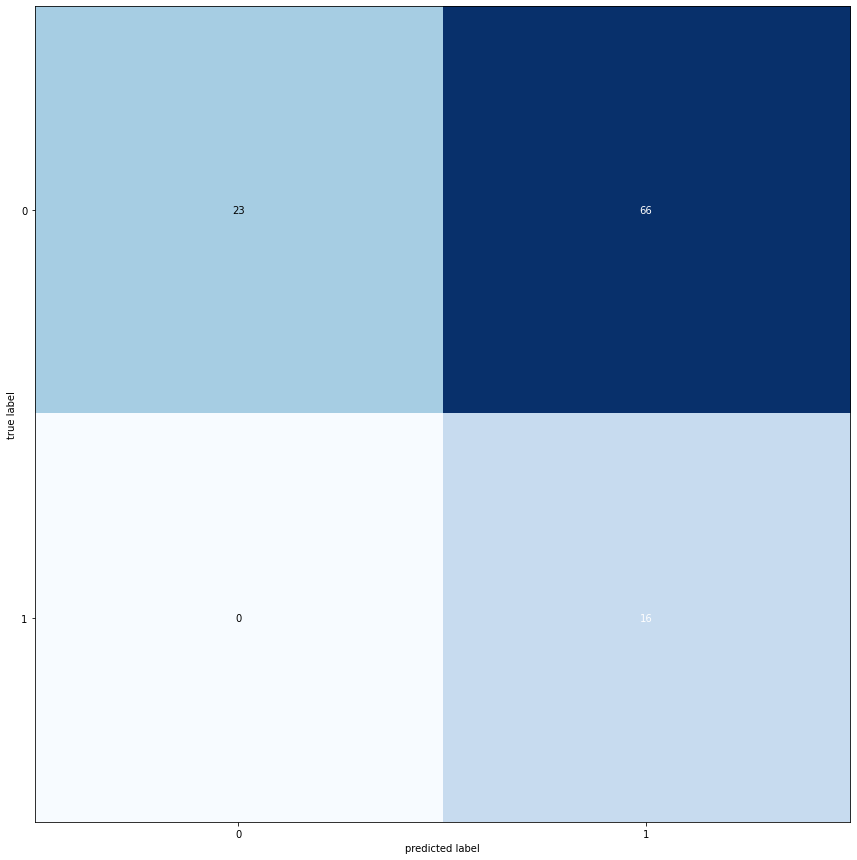

In [ ]:
InceptionRNV2_pred = InceptionRNV2_model.predict(X_test, batch_size=64, verbose=1)
InceptionRNV2_predicted = np.argmax(InceptionRNV2_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), InceptionRNV2_predicted))

plt.rcParams['figure.figsize'] = (5,5)  
plt.show()

In [ ]:
InceptionRNV2_model.save_weights('InceptionRNV2OPT_final_NOnorm_50EPCH.hdf5')

# ResNET Sencilla (TTS 85-15)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.15, 
    random_state=500)

In [ ]:
from keras.applications import ResNet50

def crear_ResNet():        
    model = tf.keras.applications.ResNet50(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation="softmax",
    )
    return model

In [ ]:
ResNet_model = crear_ResNet()
ResNet_model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])
ResNet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
ResNet = ResNet_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=32, 
    epochs=10, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True,) 

Epoch 1/10
19/19 [==============================] - 3s 182ms/step - loss: 0.0251 - accuracy: 0.9865 - val_loss: 0.6257 - val_accuracy: 0.9048
Epoch 2/10
19/19 [==============================] - 3s 182ms/step - loss: 0.0116 - accuracy: 0.9949 - val_loss: 1.3047 - val_accuracy: 0.8381
Epoch 3/10
19/19 [==============================] - 3s 182ms/step - loss: 0.0090 - accuracy: 0.9966 - val_loss: 0.3748 - val_accuracy: 0.9143
Epoch 4/10
19/19 [==============================] - 3s 182ms/step - loss: 0.0033 - accuracy: 0.9983 - val_loss: 0.6066 - val_accuracy: 0.9048
Epoch 5/10
19/19 [==============================] - 3s 182ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4335 - val_accuracy: 0.9143
Epoch 6/10
19/19 [==============================] - 3s 184ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3802 - val_accuracy: 0.9333
Epoch 7/10
19/19 [==============================] - 4s 185ms/step - loss: 6.6842e-04 - accuracy: 1.0000 - val_loss: 0.2929 - val_accuracy: 0.9429
Ep

KeyboardInterrupt: ignored

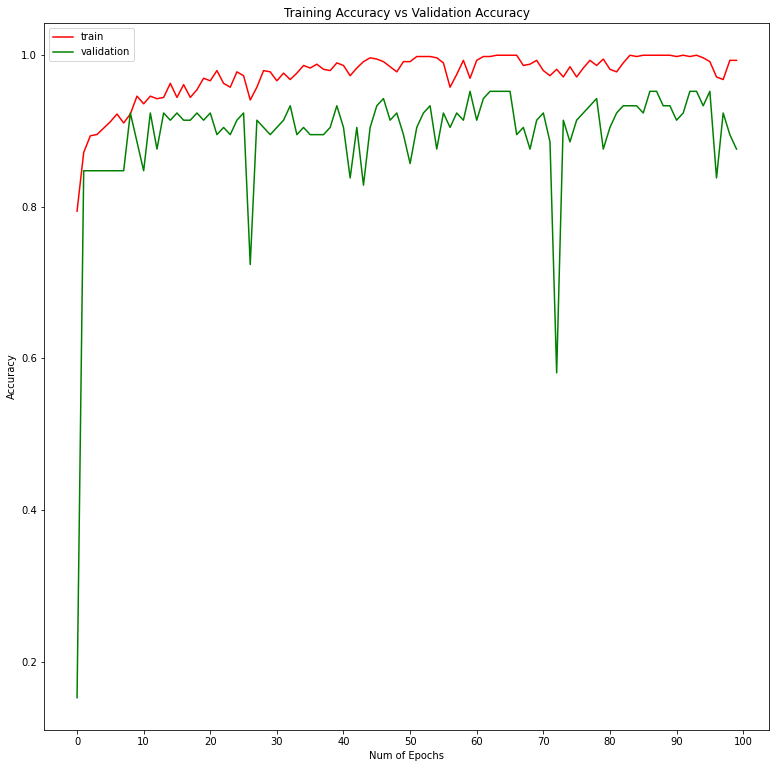

In [ ]:
plt.figure(0)  
plt.plot(ResNet.history['accuracy'],'r')  
plt.plot(ResNet.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 110, 10.0))  
plt.rcParams['figure.figsize'] = (13, 13)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

2/2 [==============================] - 0s 156ms/step


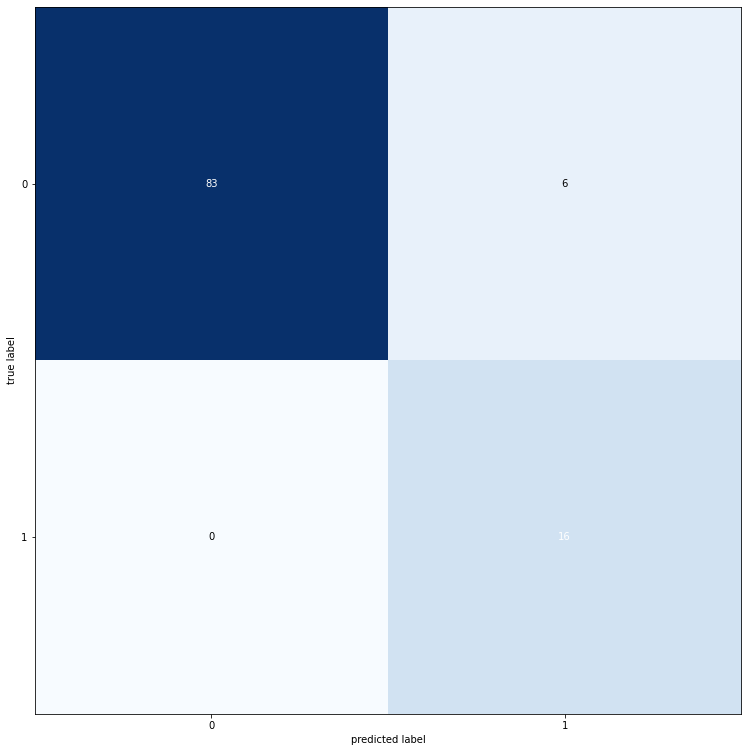

In [ ]:
ResNet_pred = ResNet_model.predict(X_test, batch_size=64, verbose=1)
ResNet_predicted = np.argmax(ResNet_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), ResNet_predicted))

plt.rcParams['figure.figsize'] = (4,4)  
plt.show()

In [ ]:
ResNet_model.save_weights('ResNet50_final_NOnorm_114EPCH.hdf5')

# ResNET Sencilla (TTS 75-25)

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.25, 
    random_state=500)

In [ ]:
from keras.applications import ResNet50

def crear_ResNet():        
    model = tf.keras.applications.ResNet50(
        include_top=True,
        weights=None,
        input_tensor=None,
        input_shape=(224,224,3),
        pooling=None,
        classes=2,
        classifier_activation="softmax",
    )
    return model

In [ ]:
ResNet_model = crear_ResNet()
ResNet_model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])
ResNet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test= tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
ResNet = ResNet_model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=32, 
    epochs=1, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    shuffle=True,) 

17/17 [==============================] - 8s 459ms/step - loss: 0.0161 - accuracy: 0.9924 - val_loss: 0.5478 - val_accuracy: 0.9029


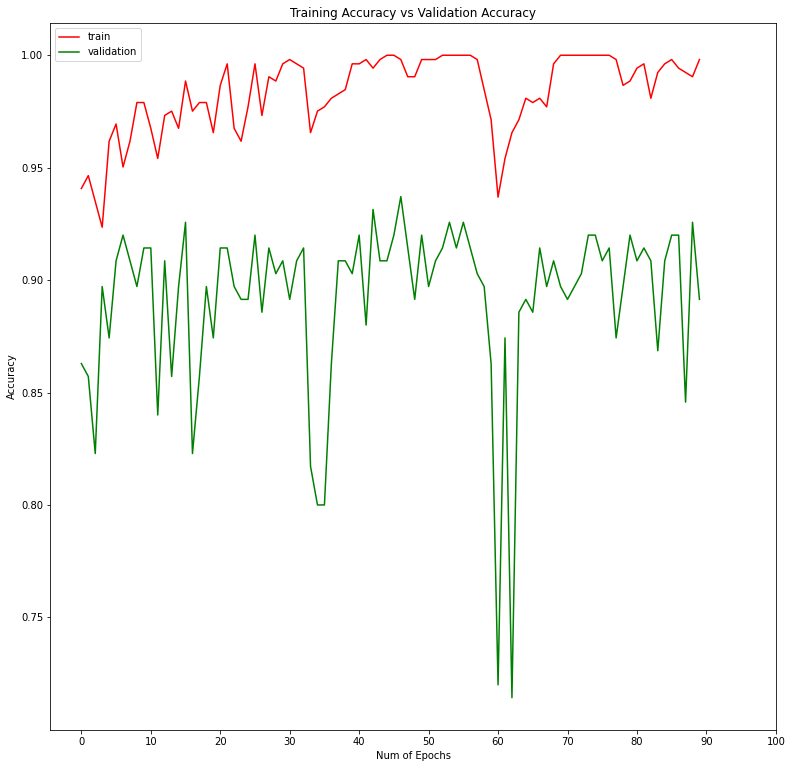

In [ ]:
plt.figure(0)  
plt.plot(ResNet.history['accuracy'],'r')  
plt.plot(ResNet.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 110, 10.0))  
plt.rcParams['figure.figsize'] = (13, 13)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.show()  

3/3 [==============================] - 1s 300ms/step


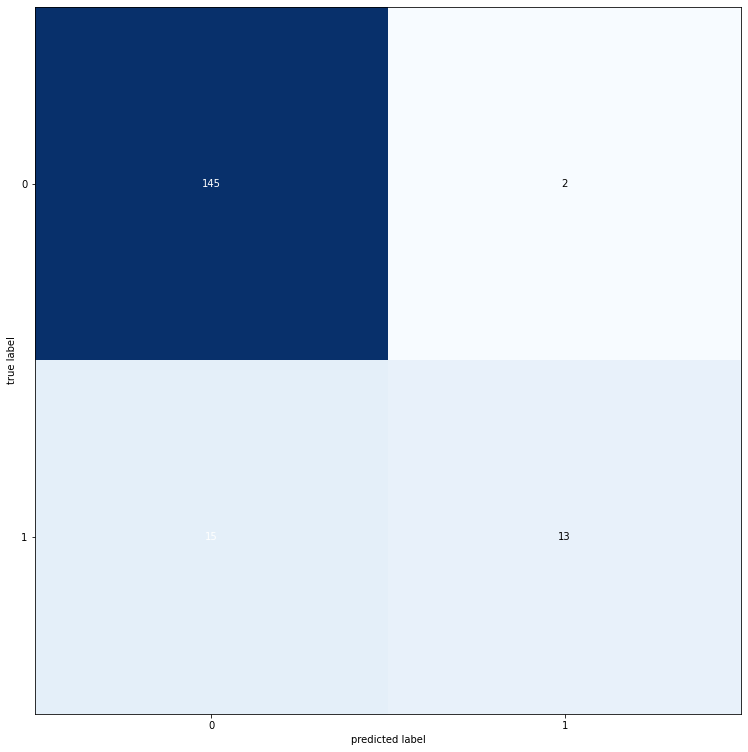

In [ ]:
ResNet_pred = ResNet_model.predict(X_test, batch_size=64, verbose=1)
ResNet_predicted = np.argmax(ResNet_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(np.argmax(y_test, axis=1), ResNet_predicted))

plt.rcParams['figure.figsize'] = (4,4)  
plt.show()

In [ ]:
ResNet_model.save_weights('ResNet50_75-25_final_NOnorm_114EPCH.hdf5')

# Ejemplo de ResNET Sencilla con cross validation

In [ ]:
from sklearn.model_selection import train_test_split

# · Definimos X e Y
X = np.array(Pacientes)
Y = np.array(Target)

# · Diividimos en Train test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.15, 
    random_state=500)

In [ ]:
from sklearn.model_selection import KFold
from keras.applications import ResNet50
def crear_ResNet():
  model = tf.keras.applications.ResNet50(
      include_top=True,
      weights=None,
      input_tensor=None,
      input_shape=(224,224,3),
      pooling=None,
      classes=2,
      classifier_activation="softmax",
      )
  return model

ResNet_model = crear_ResNet()
ResNet_model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=['accuracy'])

In [ ]:
kf = KFold(n_splits=3, random_state=100, shuffle=True)

for entrenamiento_indice, prueba_indice in kf.split(X_train):
    X_entrenamiento, X_prueba = X_train[entrenamiento_indice],X_train[prueba_indice]
    y_entrenamiento, y_prueba = y_train[entrenamiento_indice],y_train[prueba_indice]
    y_entrenamiento = tf.keras.utils.to_categorical(y_entrenamiento, 2)
    y_prueba= tf.keras.utils.to_categorical(y_prueba, 2)
    ResNet = ResNet_model.fit(
          x=X_entrenamiento, 
          y=y_entrenamiento, 
          batch_size=32, 
          epochs=50, 
          verbose=1, 
          validation_data=(X_prueba, y_prueba), 
          shuffle=True,) 

Epoch 1/50
13/13 [==============================] - 50s 996ms/step - loss: 2.4028 - accuracy: 0.8105 - val_loss: 2689.0872 - val_accuracy: 0.8283
Epoch 2/50
13/13 [==============================] - 9s 720ms/step - loss: 0.3950 - accuracy: 0.8384 - val_loss: 991.3552 - val_accuracy: 0.8283
Epoch 3/50
13/13 [==============================] - 9s 723ms/step - loss: 0.3203 - accuracy: 0.8936 - val_loss: 51.0995 - val_accuracy: 0.8283
Epoch 4/50
13/13 [==============================] - 9s 724ms/step - loss: 0.1666 - accuracy: 0.9422 - val_loss: 7.4474 - val_accuracy: 0.8283
Epoch 5/50
13/13 [==============================] - 9s 725ms/step - loss: 0.3095 - accuracy: 0.8954 - val_loss: 3.4294 - val_accuracy: 0.1515
Epoch 6/50
13/13 [==============================] - 9s 727ms/step - loss: 0.1638 - accuracy: 0.9398 - val_loss: 1.4096 - val_accuracy: 0.2273
Epoch 7/50
13/13 [==============================] - 9s 728ms/step - loss: 0.1837 - accuracy: 0.9352 - val_loss: 0.4922 - val_accuracy: 0.8081

2/2 [==============================] - 1s 674ms/step


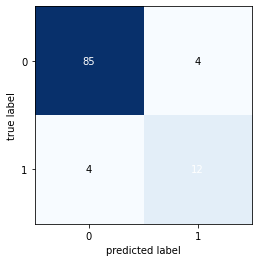

In [ ]:
# Respresentación con prueba excluida
ResNet_pred = ResNet_model.predict(X_test, batch_size=64, verbose=1)
ResNet_predicted = np.argmax(ResNet_pred, axis=1)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, ResNet_predicted))

plt.rcParams['figure.figsize'] = (4,4)  
plt.show()

# Respresentación Data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


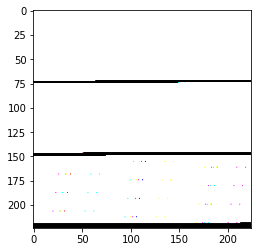

In [ ]:
img = Pacientes[5]
imgplot = plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


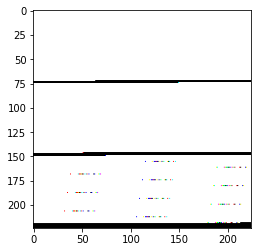

In [ ]:
img = Pacientes[650]
imgplot = plt.imshow(img)